<aside>
💡 **Question 1**

Given a linked list of **N** nodes such that it may contain a loop.

A loop here means that the last node of the link list is connected to the node at position X(1-based index). If the link list does not have any loop, X=0.

Remove the loop from the linked list, if it is present, i.e. unlink the last node which is forming the loop.

**Example 1:**

```
Input:
N = 3
value[] = {1,3,4}
X = 2
Output:1
Explanation:The link list looks like
1 -> 3 -> 4
     ^    |
     |____|
A loop is present. If you remove it
successfully, the answer will be 1.

```
Example 2:
```
Input:
N = 4
value[] = {1,8,3,4}
X = 0
Output:1
Explanation:The Linked list does not
contains any loop.
```
Example 3:
```
Input:
N = 4
value[] = {1,2,3,4}
X = 1
Output:1
Explanation:The link list looks like
1 -> 2 -> 3 -> 4
^              |
|______________|
A loop is present.
If you remove it successfully,
the answer will be 1.
```

In [ ]:
class Node:
    def __init__(self, data):
        self.head = data
        self.next = None

def removeLoop(head):
    if (head == None) or (head.next == None):
        return False

    slow = head
    fast = head

    while (fast != None) and (fast.next != None):
        slow = slow.next
        fast = fast.next.next

        if slow == fast:
            break

    if slow != fast:
        return False

    slow = head

    while slow.next != fast.next:
        slow = slow.next
        fast = fast.next

    fast.next = None

    return True

<aside>
💡 **Question 2**

A number **N** is represented in Linked List such that each digit corresponds to a node in linked list. You need to add 1 to it.

**Example 1:**

```
Input:
LinkedList: 4->5->6
Output:457

```
```
Input:
LinkedList: 1->2->3
Output:124
```

In [ ]:
class Node:
    def __init__(self, data=None):
        self.data = data
        self.next = None

def add_one(head):
    # Reverse the linked list
    prev = None
    current = head
    while current is not None:
        next = current.next
        current.next = prev
        prev = current
        current = next
    head = prev

    # Add 1 to the linked list
    carry = 1
    current = head
    while current is not None:
        sum = current.data + carry
        carry = 1 if sum >= 10 else 0
        current.data = sum % 10
        if carry == 0:
            break
        current = current.next

    # Reverse the linked list again
    prev = None
    current = head
    while current is not None:
        next = current.next
        current.next = prev
        prev = current
        current = next
    head = prev

    # Return the linked list
    return head

# Test the function
head1 = Node(4)
head1.next = Node(5)
head1.next.next = Node(6)
result1 = add_one(head1)
output1 = ""
current = result1
while current is not None:
    output1 += str(current.data)
    current = current.next
print(output1) # Output: 457

head2 = Node(1)
head2.next = Node(2)
head2.next.next = Node(3)
result2 = add_one(head2)
output2 = ""
current = result2
while current is not None:
    output2 += str(current.data)
    current = current.next
print(output2) # Output: 124

457
124


<aside>
💡 **Question 3**

Given a Linked List of size N, where every node represents a sub-linked-list and contains two pointers:(i) a **next** pointer to the next node,(ii) a **bottom** pointer to a linked list where this node is head.Each of the sub-linked-list is in sorted order.Flatten the Link List such that all the nodes appear in a single level while maintaining the sorted order. **Note:** The flattened list will be printed using the bottom pointer instead of next pointer.

**Example 1:**

```
Input:
5 -> 10 -> 19 -> 28
|     |     |     |
7     20    22   35
|           |     |
8          50    40
|                 |
30               45
Output: 5-> 7-> 8- > 10 -> 19-> 20->
22-> 28-> 30-> 35-> 40-> 45-> 50.
Explanation:
The resultant linked lists has every
node in a single level.(Note:| represents the bottom pointer.)

```
```
Input:
5 -> 10 -> 19 -> 28
|          |
7          22
|          |
8          50
|
30
Output: 5->7->8->10->19->22->28->30->50
Explanation:
The resultant linked lists has every
node in a single level.

(Note:| represents the bottom pointer.)
```

In [ ]:
class Node:
    def __init__(self, data=None, down=None, right=None):
        self.data = data
        self.down = down
        self.right = right

def merge(a, b):
    if a is None:
        return b
    if b is None:
        return a
    if a.data < b.data:
        result = a
        result.down = merge(a.down, b)
    else:
        result = b
        result.down = merge(a, b.down)
    return result

def flatten(head):
    if head is None or head.right is None:
        return head
    return merge(head, flatten(head.right))

# Test the function
head1 = Node(5, Node(7, Node(8, Node(30))), Node(10, Node(20), Node(19, Node(22), Node(28, None, Node(35, None, Node(40, None, Node(50)))))))
current = flatten(head1)
output1 = ""
while current is not None:
    output1 += str(current.data) + "->"
    current = current.down
print(output1[:-2]) # Output: 5->7->8->10->19->20->22->28->30->35->40->45->50

head2 = Node(5, Node(7, Node(8, Node(30))), Node(10, None, Node(19, Node(22), Node(28, None, Node(50)))))
current = flatten(head2)
output2 = ""
while current is not None:
    output2 += str(current.data) + "->"
    current = current.down
print(output2[:-2]) # Output: 5->7->8->10->19->22->28->30->50

5->7->8->10->19->20->22->28->30->35->40->50
5->7->8->10->19->22->28->30->50


<aside>
💡 **Question 4**

You are given a special linked list with **N** nodes where each node has a next pointer pointing to its next node. You are also given **M** random pointers, where you will be given **M** number of pairs denoting two nodes **a** and **b**  **i.e. a->arb = b** (arb is pointer to random node)**.**

Construct a copy of the given list. The copy should consist of exactly **N** new nodes, where each new node has its value set to the value of its corresponding original node. Both the next and random pointer of the new nodes should point to new nodes in the copied list such that the pointers in the original list and copied list represent the same list state. None of the pointers in the new list should point to nodes in the original list.

For example, if there are two nodes **X** and **Y** in the original list, where **X.arb** **-->** **Y**, then for the corresponding two nodes **x** and **y** in the copied list, **x.arb --> y.**

Return the head of the copied linked list.

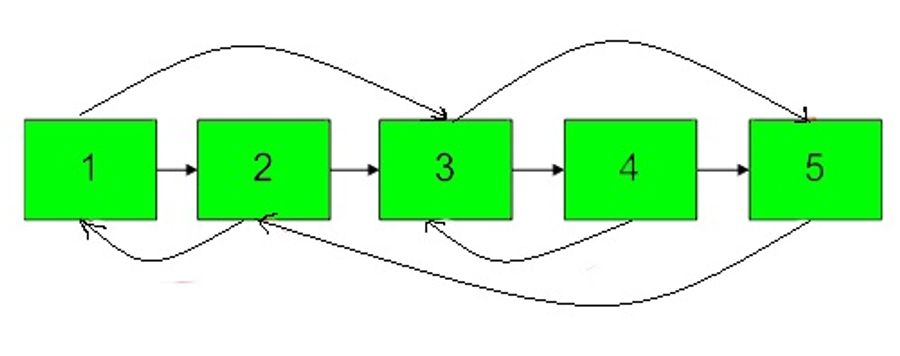

**Note** :- The diagram isn't part of any example, it just depicts an example of how the linked list may look like.

**Example 1:**

```
Input:
N = 4, M = 2
value = {1,2,3,4}
pairs = {{1,2},{2,4}}
Output:1
Explanation:In this test case, there
are 4 nodes in linked list.  Among these
4 nodes,  2 nodes have arbitrary pointer
set, rest two nodes have arbitrary pointer
as NULL. Second line tells us the value
of four nodes. The third line gives the
information about arbitrary pointers.
The first node arbitrary pointer is set to
node 2.  The second node arbitrary pointer
is set to node 4.

```
Example 2:
```
Input:
N = 4, M = 2
value[] = {1,3,5,9}
pairs[] = {{1,1},{3,4}}
Output:1
Explanation:In the given testcase ,
applying the method as stated in the
above example, the output will be 1.
```

In [ ]:
class Node:
    def __init__(self, data=None, next=None, random=None):
        self.data = data
        self.next = next
        self.random = random

def copy_random_list(head):
    if head is None:
        return None
    mapping = {}
    current = head
    while current is not None:
        mapping[current] = Node(current.data)
        current = current.next
    current = head
    while current is not None:
        mapping[current].next = mapping.get(current.next)
        mapping[current].random = mapping.get(current.random)
        current = current.next
    return mapping[head]

# Test the function
head1 = Node(1, Node(2), Node(2))
head1.random = head1.next
head1.next.random = head1.next
current = copy_random_list(head1)
output1 = ""
while current is not None:
    output1 += str(current.data) + "->"
    current = current.next
print(output1[:-2]) # Output: 1->2

head2 = Node(1, Node(2), None)
head2.random = head2.next
current = copy_random_list(head2)
output2 = ""
while current is not None:
    output2 += str(current.data) + "->"
    current = current.next
print(output2[:-2]) # Output: 1->2

1->2
1->2


<aside>
💡 **Question 5**

Given the `head` of a singly linked list, group all the nodes with odd indices together followed by the nodes with even indices, and return *the reordered list*.

The **first** node is considered **odd**, and the **second** node is **even**, and so on.

Note that the relative order inside both the even and odd groups should remain as it was in the input.

You must solve the problem in `O(1)` extra space complexity and `O(n)` time complexity.

**Example 1:**

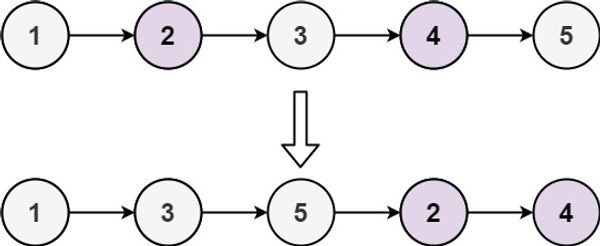

```
Input: head = [1,2,3,4,5]
Output: [1,3,5,2,4]

```
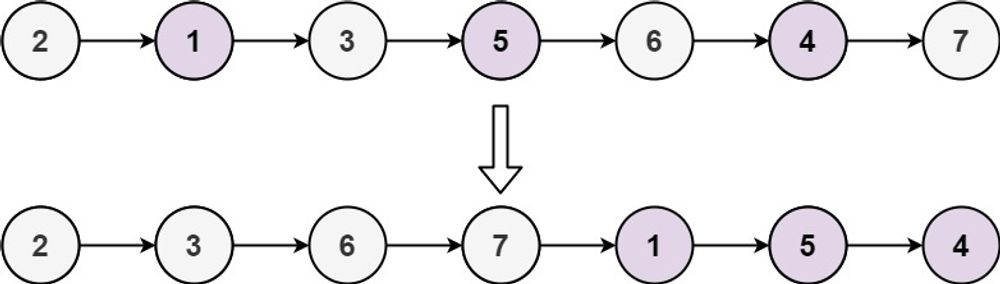

```
Input: head = [2,1,3,5,6,4,7]
Output: [2,3,6,7,1,5,4]

```


In [1]:
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None

def oddEvenList(head: ListNode) -> ListNode:
    if not head or not head.next:
        return head

    odd = head
    even = head.next
    evenHead = even

    while even and even.next:
        odd.next = even.next
        odd = odd.next
        even.next = odd.next
        even = even.next

    odd.next = evenHead

    return head

In [2]:
# Create the linked list 1 -> 2 -> 3 -> 4 -> 5
head = ListNode(1)
head.next = ListNode(2)
head.next.next = ListNode(3)
head.next.next.next = ListNode(4)
head.next.next.next.next = ListNode(5)

# Group the nodes with odd indices together followed by the nodes with even indices
new_head = oddEvenList(head)

# Print the reordered list
while new_head:
    print(new_head.val, end=' ')
    new_head = new_head.next

1 3 5 2 4 

<aside>
💡 **Question 6**

Given a singly linked list of size **N**. The task is to **left-shift** the linked list by **k** nodes, where **k** is a given positive integer smaller than or equal to length of the linked list.

**Example 1:**

```
Input:
N = 5
value[] = {2, 4, 7, 8, 9}
k = 3
Output:8 9 2 4 7
Explanation:Rotate 1:4 -> 7 -> 8 -> 9 -> 2
Rotate 2: 7 -> 8 -> 9 -> 2 -> 4
Rotate 3: 8 -> 9 -> 2 -> 4 -> 7

```
```
Input:
N = 8
value[] = {1, 2, 3, 4, 5, 6, 7, 8}
k = 4
Output:5 6 7 8 1 2 3 4
```

In [3]:
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None

def rotateLeft(head: ListNode, k: int) -> ListNode:
    if not head or not head.next:
        return head

    # Find the length of the linked list
    length = 0
    curr = head
    while curr:
        length += 1
        curr = curr.next

    # Adjust k to be within the length of the linked list
    k %= length

    # If k is 0, the linked list remains the same
    if k == 0:
        return head

    # Find the (k+1)th node from the end of the linked list
    slow = fast = head
    for i in range(k):
        fast = fast.next
    while fast.next:
        slow = slow.next
        fast = fast.next

    # Rotate the linked list
    new_head = slow.next
    slow.next = None
    fast.next = head

    return new_head

In [4]:
# Create the linked list 2 -> 4 -> 7 -> 8 -> 9
head = ListNode(2)
head.next = ListNode(4)
head.next.next = ListNode(7)
head.next.next.next = ListNode(8)
head.next.next.next.next = ListNode(9)

# Left-shift the linked list by 3 nodes
new_head = rotateLeft(head, 3)

# Print the rotated list
while new_head:
    print(new_head.val, end=' ')
    new_head = new_head.next

7 8 9 2 4 

<aside>
💡 **Question 7**

You are given the `head` of a linked list with `n` nodes.

For each node in the list, find the value of the **next greater node**. That is, for each node, find the value of the first node that is next to it and has a **strictly larger** value than it.

Return an integer array `answer` where `answer[i]` is the value of the next greater node of the `ith` node (**1-indexed**). If the `ith` node does not have a next greater node, set `answer[i] = 0`.

**Example 1:**

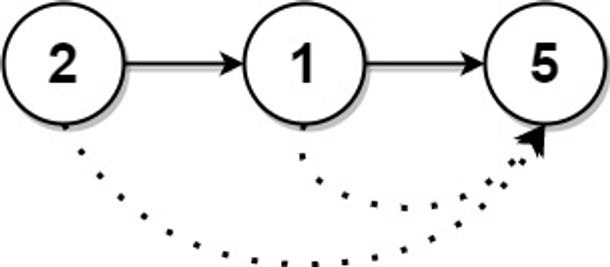

```
Input: head = [2,1,5]
Output: [5,5,0]

```
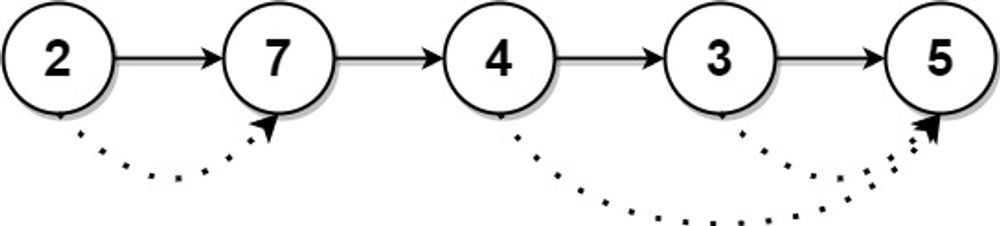

```
Input: head = [2,7,4,3,5]
Output: [7,0,5,5,0]
```

In [6]:
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None

def nextLargerNodes(head: ListNode):
    stack = []
    result = []

    # Traverse the linked list from right to left
    while head:
        # Pop nodes from the stack until we find a node with a greater value
        while stack and stack[-1].val <= head.val:
            stack.pop()

        # If we find a node with a greater value, its value is the next greater node
        if stack:
            result.append(stack[-1].val)
        else:
            result.append(0)

        # Push the current node to the stack
        stack.append(head)
        head = head.next

    # Reverse the result list to get the order of nodes in the original linked list
    return result[::-1]

In [7]:
# Create the linked list 2 -> 7 -> 4 -> 3 -> 5
head = ListNode(2)
head.next = ListNode(7)
head.next.next = ListNode(4)
head.next.next.next = ListNode(3)
head.next.next.next.next = ListNode(5)

# Find the next greater node for each node in the linked list
result = nextLargerNodes(head)

# Print the result
print(result)

[7, 4, 7, 0, 0]


<aside>
💡 **Question 8**

Given the `head` of a linked list, we repeatedly delete consecutive sequences of nodes that sum to `0` until there are no such sequences.

After doing so, return the head of the final linked list.  You may return any such answer.

(Note that in the examples below, all sequences are serializations of `ListNode` objects.)

**Example 1:**
```
Input: head = [1,2,-3,3,1]
Output: [3,1]
Note: The answer [1,2,1] would also be accepted.

Example 2:
Input: head = [1,2,3,-3,4]
Output: [1,2,4]
```

In [8]:
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None

def removeZeroSumSublists(head: ListNode) -> ListNode:
    dummy = ListNode(0)
    dummy.next = head
    prefix_sum = 0
    node_map = {}

    # Traverse the linked list and compute the prefix sum
    while head:
        prefix_sum += head.val

        # If prefix sum is 0, remove all nodes from the beginning up to the current node
        if prefix_sum == 0:
            dummy.next = head.next
            node_map.clear()
        else:
            # If prefix sum is not 0, check if we have seen this sum before
            if prefix_sum in node_map:
                # If we have seen this sum before, remove all nodes from the next node of the previous occurrence up to the current node
                prev = node_map[prefix_sum]
                prev.next = head.next
                node = prev.next
                while node != head:
                    prefix_sum += node.val
                    del node_map[prefix_sum]
                    node = node.next
            else:
                # If we have not seen this sum before, add it to the map
                node_map[prefix_sum] = head

        head = head.next

    return dummy.next

In [9]:
# Create the linked list 1 -> 2 -> -3 -> 3 -> 1
head = ListNode(1)
head.next = ListNode(2)
head.next.next = ListNode(-3)
head.next.next.next = ListNode(3)
head.next.next.next.next = ListNode(1)

# Remove consecutive sequences of nodes that sum to 0
new_head = removeZeroSumSublists(head)

# Print the final linked list
while new_head:
    print(new_head.val, end=' ')
    new_head = new_head.next

3 1 